In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../..')))
from scripts.task4_insights import *
from scripts.config import DATA_PATHS


In [2]:
df = load_data(DATA_PATHS["sentiment_results"])


In [3]:
banks = bank_list(df)
banks


['Bank of Abyssinia', 'Commercial Bank of Ethiopia', 'Dashen Bank']

In [4]:
detect_drivers_and_pains(df, "Commercial Bank of Ethiopia")


{'bank': 'Commercial Bank of Ethiopia',
 'drivers': [{'term': 'app',
   'count': 118,
   'avg_rating': np.float64(4.0423728813559325),
   'avg_sentiment': np.float64(0.35621525423728806),
   'examples': ['good app',
    "why didn't work this app?",
    'The app makes our life easier. Thank you CBE!',
    'the most advanced app. but how to stay safe?',
    'It is nice app']},
  {'term': 'good',
   'count': 104,
   'avg_rating': np.float64(4.663461538461538),
   'avg_sentiment': np.float64(0.452525),
   'examples': ['good app',
    'Good application',
    'good app',
    'very good banking service and fast service',
    'good']},
  {'term': 'best',
   'count': 35,
   'avg_rating': np.float64(4.771428571428571),
   'avg_sentiment': np.float64(0.6364085714285715),
   'examples': ['best', 'best app', 'best', 'the best apps', 'best']},
  {'term': 'nice',
   'count': 30,
   'avg_rating': np.float64(4.666666666666667),
   'avg_sentiment': np.float64(0.4714166666666667),
   'examples': ['It is 

In [6]:
bank_name = "Commercial Bank of Ethiopia"
corpus = df[df["bank_name"] == bank_name]["clean_text"]
top_terms_tfidf(corpus, topn=20)

[('good', np.float64(78.83678617701337)),
 ('app', np.float64(52.11766571245879)),
 ('best', np.float64(25.14025423205714)),
 ('nice', np.float64(22.61559399209762)),
 ('cbe', np.float64(16.661219517419)),
 ('good app', np.float64(14.801973037770788)),
 ('bank', np.float64(14.000228048971172)),
 ('excellent', np.float64(12.499300972865605)),
 ('ok', np.float64(10.305026370105832)),
 ('application', np.float64(9.555138646855056)),
 ('like', np.float64(9.314155567607603)),
 ('update', np.float64(8.629780039463292)),
 ('best app', np.float64(6.949021533271146)),
 ('service', np.float64(6.743602339520191)),
 ('nice app', np.float64(6.684623759854424)),
 ('great', np.float64(6.225126120935704)),
 ('apps', np.float64(6.040782051268026)),
 ('work', np.float64(5.850306517288865)),
 ('banking', np.float64(5.8343127623698905)),
 ('use', np.float64(5.7314748838455145))]

In [8]:
text = " ".join(df[df.bank_name == bank_name]["clean_text"])
output_path = f"visuals/{bank_name}_wordcloud.png"

wordcloud_from_text(text, output_path)
output_path


'visuals/Commercial Bank of Ethiopia_wordcloud.png'

In [9]:
all_insights = {}

for bank in banks:
    all_insights[bank] = detect_drivers_and_pains(df, bank)

all_insights


{'Bank of Abyssinia': {'bank': 'Bank of Abyssinia',
  'drivers': [{'term': 'good',
    'count': 71,
    'avg_rating': np.float64(4.394366197183099),
    'avg_sentiment': np.float64(0.4278225352112676),
    'examples': ['Very Good',
     'good!',
     'good jop',
     'very good',
     'good service']},
   {'term': 'best',
    'count': 30,
    'avg_rating': np.float64(4.733333333333333),
    'avg_sentiment': np.float64(0.6824333333333334),
    'examples': ['best of best',
     'best app',
     'Best app',
     'Best of best',
     'I love this bank the best experience ever.']}],
  'pains': [{'term': 'worst',
    'count': 21,
    'avg_rating': np.float64(1.0),
    'avg_sentiment': np.float64(-0.6396904761904763),
    'examples': ['I cant belive I could find the worst bank app ever .yet very simple to fix the problem and the company just ignored it. no body can do business with this kind of app.',
     'the worst app ever,',
     'the worst app in my financial experience.',
     "the wors

In [17]:
import json

with open("../../data/outputs/bank_insights.json", "w") as f:
    json.dump(all_insights, f, indent=4)


In [18]:
bank_reports = {}

for bank in banks:
    insights= detect_drivers_and_pains(df, bank)
    recs = recommend_improvements(insights["drivers"], insights["pains"])
    
    bank_reports[bank] = {
        "drivers": insights["drivers"],
        "pains": insights["pains"],
        "recommendations": recs
    }

bank_reports


{'Bank of Abyssinia': {'drivers': [{'term': 'good',
    'count': 71,
    'avg_rating': np.float64(4.394366197183099),
    'avg_sentiment': np.float64(0.4278225352112676),
    'examples': ['Very Good',
     'good!',
     'good jop',
     'very good',
     'good service']},
   {'term': 'best',
    'count': 30,
    'avg_rating': np.float64(4.733333333333333),
    'avg_sentiment': np.float64(0.6824333333333334),
    'examples': ['best of best',
     'best app',
     'Best app',
     'Best of best',
     'I love this bank the best experience ever.']}],
  'pains': [{'term': 'worst',
    'count': 21,
    'avg_rating': np.float64(1.0),
    'avg_sentiment': np.float64(-0.6396904761904763),
    'examples': ['I cant belive I could find the worst bank app ever .yet very simple to fix the problem and the company just ignored it. no body can do business with this kind of app.',
     'the worst app ever,',
     'the worst app in my financial experience.',
     "the worst bank ever. slow don't accept 

In [18]:
rows = []

for bank, data in all_insights.items():
    for d in data["drivers"]:
        rows.append([bank, "driver", d["term"], d["count"], d["avg_rating"], d["avg_sentiment"]])
    for p in data["pains"]:
        rows.append([bank, "pain", p["term"], p["count"], p["avg_rating"], p["avg_sentiment"]])

summary_df = pd.DataFrame(rows, columns=[
    "bank", "type", "term", "count", "avg_rating", "avg_sentiment"
])

summary_df.to_csv("../../data/outputs/insights_summary.csv", index=False)
summary_df.head()


,bank,type,term,count,avg_rating,avg_sentiment
0,Bank of Abyssinia,driver,good,71,4.394366,0.427823
1,Bank of Abyssinia,driver,best,30,4.733333,0.682433
2,Bank of Abyssinia,pain,worst,21,1.000000,-0.639690
3,Bank of Abyssinia,pain,time,16,1.750000,-0.228050
4,Bank of Abyssinia,pain,developer,13,1.692308,-0.120069


In [19]:
summary_df.groupby(["bank", "type"]).size().unstack(fill_value=0)


type,driver,pain
bank,,
Bank of Abyssinia,2,8
Commercial Bank of Ethiopia,6,2
Dashen Bank,12,2


In [10]:
compare_banks(df, "Commercial Bank of Ethiopia", "Bank of Abyssinia")


{'bank_1': 'Commercial Bank of Ethiopia',
 'bank_2': 'Bank of Abyssinia',
 'avg_rating': {'Commercial Bank of Ethiopia': np.float64(4.152777777777778),
  'Bank of Abyssinia': np.float64(3.3904761904761904)},
 'avg_sentiment': {'Commercial Bank of Ethiopia': np.float64(0.2952386574074074),
  'Bank of Abyssinia': np.float64(0.14040904761904763)},
 'total_reviews': {'Commercial Bank of Ethiopia': 432,
  'Bank of Abyssinia': 420}}

In [11]:
compare_banks(df, "Commercial Bank of Ethiopia", "Dashen Bank")

{'bank_1': 'Commercial Bank of Ethiopia',
 'bank_2': 'Dashen Bank',
 'avg_rating': {'Commercial Bank of Ethiopia': np.float64(4.152777777777778),
  'Dashen Bank': np.float64(4.115942028985507)},
 'avg_sentiment': {'Commercial Bank of Ethiopia': np.float64(0.2952386574074074),
  'Dashen Bank': np.float64(0.3491072463768116)},
 'total_reviews': {'Commercial Bank of Ethiopia': 432, 'Dashen Bank': 414}}

In [5]:
insights_CBE = detect_drivers_and_pains(df, "Commercial Bank of Ethiopia")
recommend_improvements(insights_CBE["drivers"], insights_CBE["pains"])



["Improve issues related to 'app'—this is a frequent customer complaint.",
 "Improve issues related to 'good'—this is a frequent customer complaint.",
 "Expand and promote strong area 'app' to improve customer satisfaction.",
 "Expand and promote strong area 'good' to improve customer satisfaction."]

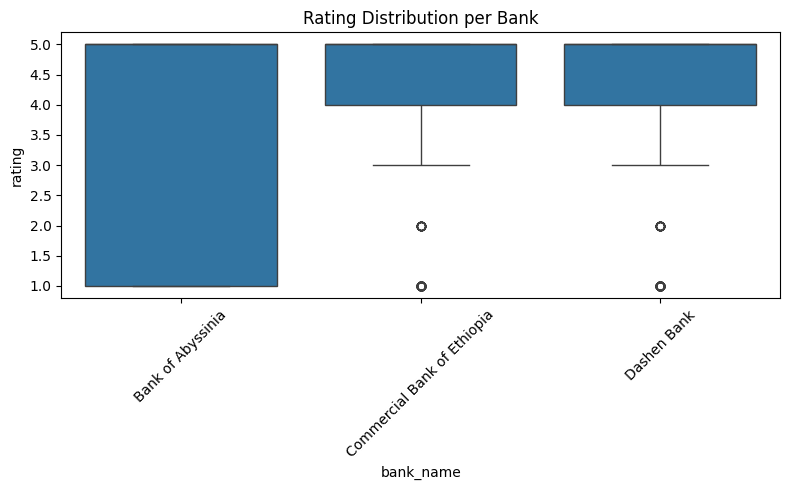

In [6]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='bank_name', y='rating')
plt.xticks(rotation=45)
plt.title("Rating Distribution per Bank")
plt.tight_layout()
plt.show()


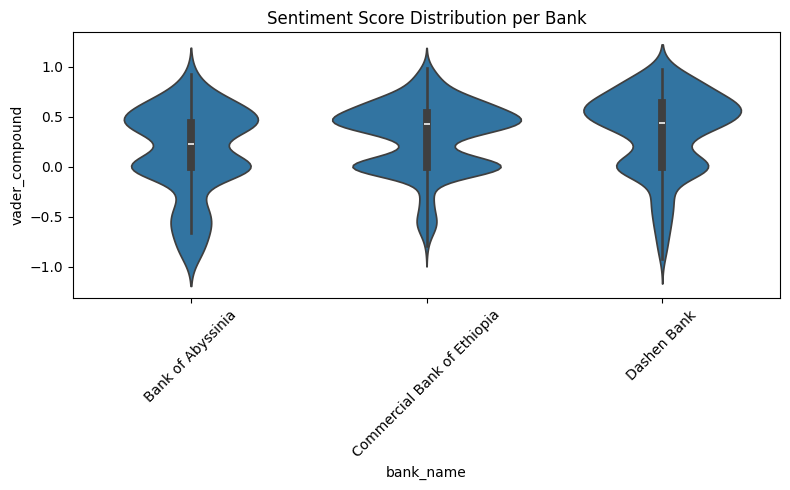

In [7]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='bank_name', y='vader_compound')
plt.xticks(rotation=45)
plt.title("Sentiment Score Distribution per Bank")
plt.tight_layout()
plt.show()


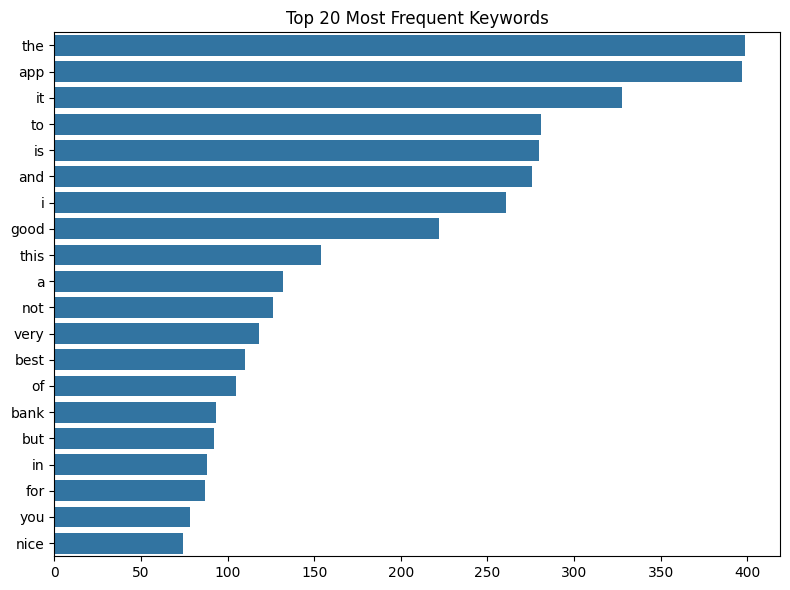

In [8]:
from collections import Counter

all_words = " ".join(df["clean_text"]).split()
counts = Counter(all_words).most_common(20)

words, freq = zip(*counts)

plt.figure(figsize=(8,6))
sns.barplot(x=list(freq), y=list(words))
plt.title("Top 20 Most Frequent Keywords")
plt.tight_layout()
plt.show()


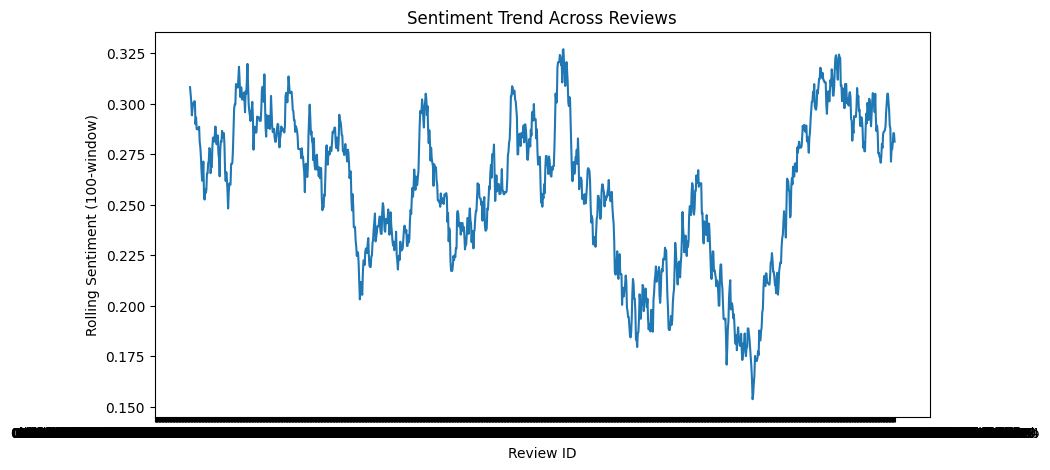

In [9]:
df_sorted = df.sort_values("review_id")
df_sorted["rolling_sentiment"] = df_sorted["vader_compound"].rolling(100).mean()

plt.figure(figsize=(10,5))
plt.plot(df_sorted["review_id"], df_sorted["rolling_sentiment"])
plt.title("Sentiment Trend Across Reviews")
plt.xlabel("Review ID")
plt.ylabel("Rolling Sentiment (100-window)")
plt.show()


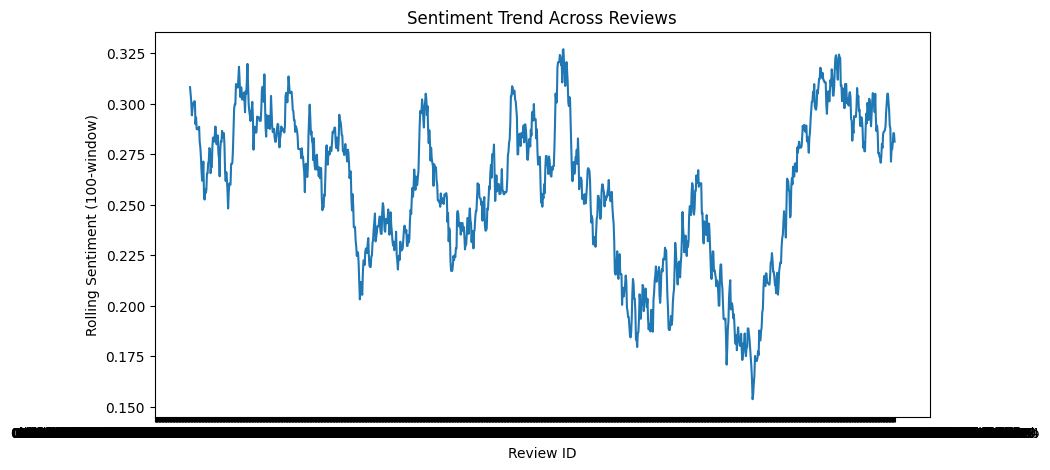

In [10]:
df_sorted = df.sort_values("review_id")
df_sorted["rolling_sentiment"] = df_sorted["vader_compound"].rolling(100).mean()

plt.figure(figsize=(10,5))
plt.plot(df_sorted["review_id"], df_sorted["rolling_sentiment"])
plt.title("Sentiment Trend Across Reviews")
plt.xlabel("Review ID")
plt.ylabel("Rolling Sentiment (100-window)")
plt.show()


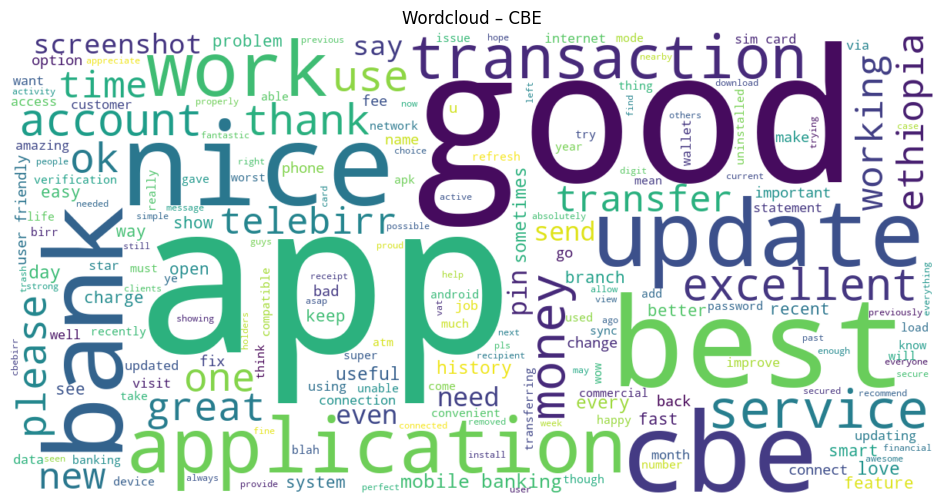

In [11]:
text = " ".join(df[df["bank_name"] == "Commercial Bank of Ethiopia"]["clean_text"])
wordcloud = WordCloud(width=1200, height=600, background_color="white").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud – CBE")
plt.show()


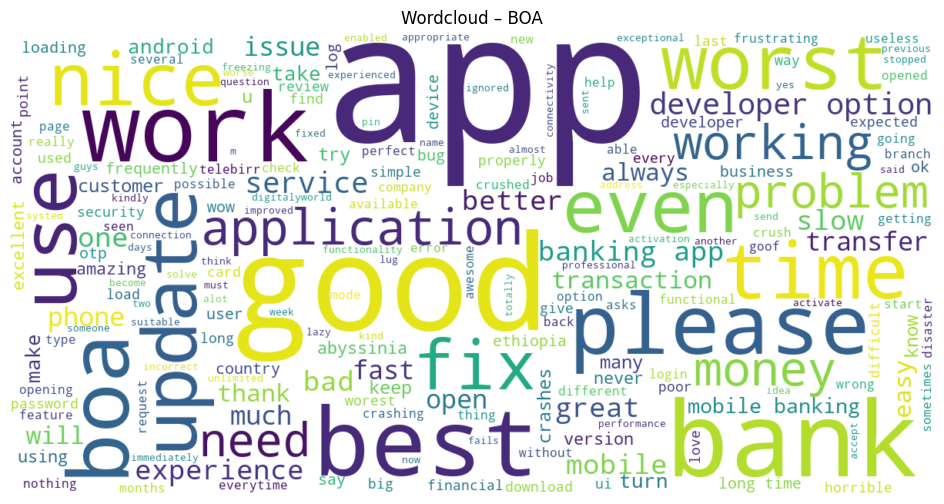

In [14]:
text = " ".join(df[df["bank_name"] == "Bank of Abyssinia"]["clean_text"])
wordcloud = WordCloud(width=1200, height=600, background_color="white").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud – BOA")
plt.show()


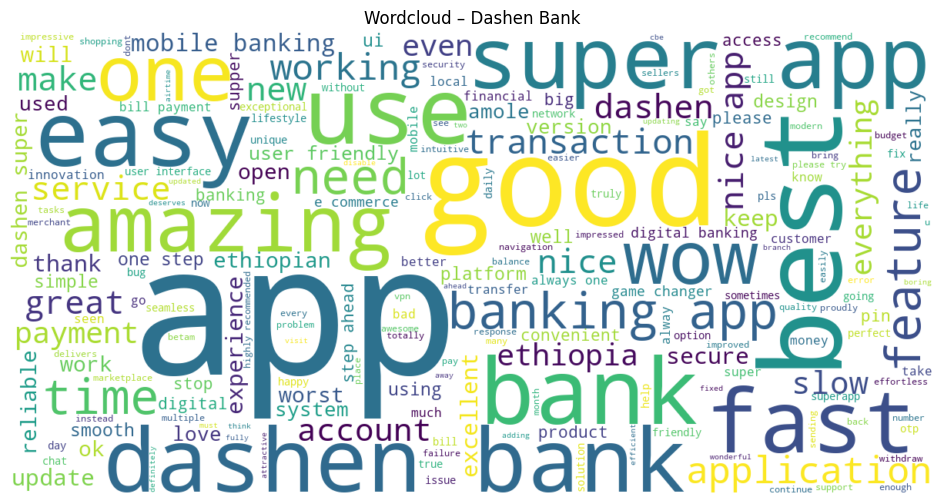

In [15]:
text = " ".join(df[df["bank_name"] == "Dashen Bank"]["clean_text"])
wordcloud = WordCloud(width=1200, height=600, background_color="white").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud – Dashen Bank")
plt.show()


Ethical Considerations & Bias Analysis

✔ 1. Review bias (Negativity bias)
People tend to post more reviews when angry → apps can appear worse than they are.
This means overall sentiment scores may skew negative.

✔ 2. Sample bias
Reviews come mainly from digitally-active users → rural and older populations underrepresented.

✔ 3. Platform bias
If reviews come from Google Play, it may overrepresent users with lower-end Android devices who experience performance issues.

✔ 4. Rating manipulation risk
Some banks may encourage 5-star reviews or suppress negative feedback.

✔ 5. Language bias
If reviews in Amharic or mixed languages were filtered or poorly tokenized, insights may be inaccurate.